In [ ]:
PAGE-1: Mini Capstone Project
Business Problem - Amazon Sales Analyzation in different Amazon Stores

In [2]:
import pymysql

In [3]:
conn = pymysql.connect(host = "localhost",
                       user = "root",
                       password = "Gova@8204",
                       database = "amazon")

In [4]:
cur = conn.cursor()

In [5]:
import warnings
warnings.filterwarnings('ignore') 

In [6]:
import pandas as pd
Q1 = "SELECT * FROM amazon"
cur.execute(Q1)
df = pd.read_sql(Q1,conn)

In [8]:

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,timeofday,dayname,monthname,weekdayno
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,0 days 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,Saturday,January,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,0 days 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,Friday,March,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,0 days 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,Sunday,March,6
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,0 days 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,Sunday,January,6
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,0 days 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,Friday,February,4


In [11]:
print(df.shape)
print(df.size)
print(df.ndim)
print(df.index)

(1000, 21)
21000
2
RangeIndex(start=0, stop=1000, step=1)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Invoice ID               1000 non-null   object         
 1   Branch                   1000 non-null   object         
 2   City                     1000 non-null   object         
 3   Customer type            1000 non-null   object         
 4   Gender                   1000 non-null   object         
 5   Product line             1000 non-null   object         
 6   Unit price               1000 non-null   float64        
 7   Quantity                 1000 non-null   int64          
 8   Tax 5%                   1000 non-null   float64        
 9   Total                    1000 non-null   float64        
 10  Date                     1000 non-null   object         
 11  Time                     1000 non-null   timedelta64[ns]
 12  Payment              

In [18]:
#1.	What is the count of distinct cities in the dataset?
Q1 = "SELECT count(distinct City) as distinct_city_count from amazon"
cur.execute(Q1)
pd.read_sql(Q1,conn)

,distinct_city_count
0,3


In [19]:
#2.	For each branch, what is the corresponding city?
Q1 = "SELECT distinct(Branch), City from amazon order by Branch"
cur.execute(Q1)
pd.read_sql(Q1,conn)

,Branch,City
0,A,Yangon
1,B,Mandalay
2,C,Naypyitaw


In [20]:
#3.	What is the count of distinct product lines in the dataset?
Q1 = "SELECT count(distinct `Product line`) as distinct_productline_count from amazon"
cur.execute(Q1)
pd.read_sql(Q1,conn)

,distinct_productline_count
0,6


In [21]:
#4.	Which payment method occurs most frequently?
Q1 = """WITH paymode as (SELECT Payment, count(*) as Paymode_count from amazon group by Payment)
SELECT Payment FROM paymode Where Paymode_count = (SELECT MAX(Paymode_count) FROM paymode)"""
cur.execute(Q1)
pd.read_sql(Q1,conn)

,Payment
0,Ewallet


In [22]:
# 5.	Which product line has the highest sales?

Q1 = """With Total_Prod_Sales as (
SELECT `Product line`, sum(Total) as Product_Sale FROM amazon group by `Product line`)
SELECT `Product line` FROM Total_Prod_Sales WHERE Product_Sale IN (SELECT MAX(Product_Sale) FROM Total_Prod_Sales)"""
cur.execute(Q1)
pd.read_sql(Q1,conn)

,Product line
0,Food and beverages


In [25]:
#6.	How much revenue is generated each month?
Q1 = "SELECT monthname as Month_Name, sum(`gross income`) as Total_Income_Monthly from amazon group by Month_Name"
cur.execute(Q1)
pd.read_sql(Q1,conn)

,Month_Name,Total_Income_Monthly
0,January,5537.708
1,March,5212.167
2,February,4629.494


In [26]:
#7.	In which month did the cost of goods sold reach its peak?
Q = """with M_cogs as (
SELECT monthname as Month_Name, sum(cogs) as TotalCost_OfSoldGoods from amazon group by Month_Name )
SELECT Month_Name from M_cogs WHERE TotalCost_OfSoldGoods = (SELECT MAX(TotalCost_OfSoldGoods) FROM M_cogs)"""
cur.execute(Q1)
pd.read_sql(Q1,conn)

,Month_Name,Total_Income_Monthly
0,January,5537.708
1,March,5212.167
2,February,4629.494


In [27]:
#8.	Which product line generated the highest revenue?
Q1 = """With Prod_Wise_Rev as (
SELECT `Product line`, sum(`gross income`) as Product_Revenue FROM amazon group by `Product line`)
SELECT `Product line` FROM  Prod_Wise_Rev WHERE Product_Revenue IN (SELECT MAX(Product_Revenue) FROM Prod_Wise_Rev)"""
cur.execute(Q1)
pd.read_sql(Q1,conn)

,Product line
0,Food and beverages


In [28]:
#9.	In which city was the highest revenue recorded?
Q1 = """WITH cgr as (SELECT City, sum(`gross income`) as City_Gross_Income from amazon group by City)
SELECT City from cgr where City_Gross_Income IN (SELECT max(City_Gross_Income) from cgr)"""
cur.execute(Q1)
pd.read_sql(Q1,conn)

,City
0,Naypyitaw


In [29]:
#10.	Which product line incurred the highest Value Added Tax?
Q1 = """SELECT `Product line` FROM(
SELECT `Product line`, sum(`Tax 5%`) as Tax FROM amazon group by `Product line` order by Tax desc limit 1) as ht"""
cur.execute(Q1)
pd.read_sql(Q1,conn)

,Product line
0,Food and beverages


In [30]:
#11.For each product line, add a column indicating "Good" if its sales are above average, otherwise "Bad."
Q1 = """SELECT Product_Line,
Case 
When prod_Avg_Sale>All_Avg_Sale THEN "GOOD"
ELSE "BAD" END AS "GOOD/BAD_Rating"
FROM(
SELECT distinct(`Product line`) as Product_Line, 
avg(Total) over(partition by `Product line`) as prod_Avg_Sale,
avg(Total) over() as All_Avg_Sale from amazon 
) as Sale"""
cur.execute(Q1)
pd.read_sql(Q1,conn)

,Product_Line,GOOD/BAD_Rating
0,Electronic accessories,BAD
1,Fashion accessories,BAD
2,Food and beverages,BAD
3,Health and beauty,GOOD
4,Home and lifestyle,GOOD
5,Sports and travel,GOOD


In [31]:
#12.Identify the branch that exceeded the average number of products sold.
Q1 = """SELECT Branch 
FROM( 
	SELECT distinct(Branch), 
	avg(Quantity) over(partition by  Branch) as prod_Avg_Sale,
	avg(Quantity) over() as All_Prod_Avg_Sale from amazon
	) as Branch_Sale 
	WHERE prod_Avg_Sale>All_Prod_Avg_Sale"""
cur.execute(Q1)
pd.read_sql(Q1,conn)

,Branch
0,C


In [106]:
#13.	Which product line is most frequently associated with each gender?
Q1 = """SELECT Gender, `Product line`, purchase_count
FROM (
    SELECT Gender, `Product line` , COUNT(*) AS purchase_count,
    RANK() OVER (PARTITION BY Gender ORDER BY COUNT(*) DESC) AS prod_rank
    FROM amazon GROUP BY Gender, `Product line`
) AS gender_product_counts"""
cur.execute(Q1)
df = pd.read_sql(Q1,conn)
df.head()

,Gender,Product line,purchase_count
0,Female,Fashion accessories,96
1,Female,Food and beverages,90
2,Female,Sports and travel,88
3,Female,Electronic accessories,84
4,Female,Home and lifestyle,79


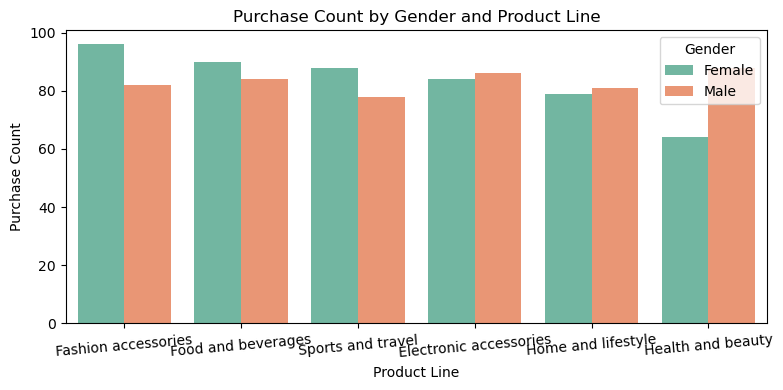

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='Product line', y='purchase_count', hue='Gender', palette='Set2')
plt.title('Purchase Count by Gender and Product Line')
plt.xlabel('Product Line')
plt.ylabel('Purchase Count')
plt.legend(title='Gender')
plt.xticks(rotation=5)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [33]:
#14.	Calculate the average rating for each product line.
Q1 = """SELECT distinct(`Product line`), avg(Rating) over(partition by `Product line`) as Avg_Rating_each_Product from amazon 
order by Avg_Rating_each_Product desc"""
cur.execute(Q1)
pd.read_sql(Q1,conn)

,Product line,Avg_Rating_each_Product
0,Food and beverages,7.113218
1,Fashion accessories,7.029213
2,Health and beauty,7.003289
3,Electronic accessories,6.924706
4,Sports and travel,6.916265
5,Home and lifestyle,6.837500


In [132]:
#15.	Count the sales occurrences for each time of day on every weekday.
#Day Wise Orders
Q1 = """SELECT dayname, weekdayno, count(*) as sales_occurrences from amazon group by dayname, weekdayno order by weekdayno """
cur.execute(Q1)
df = pd.read_sql(Q1,conn)
df

,dayname,weekdayno,sales_occurrences
0,Monday,0,125
1,Tuesday,1,158
2,Wednesday,2,143
3,Thursday,3,138
4,Friday,4,139
5,Saturday,5,164
6,Sunday,6,133


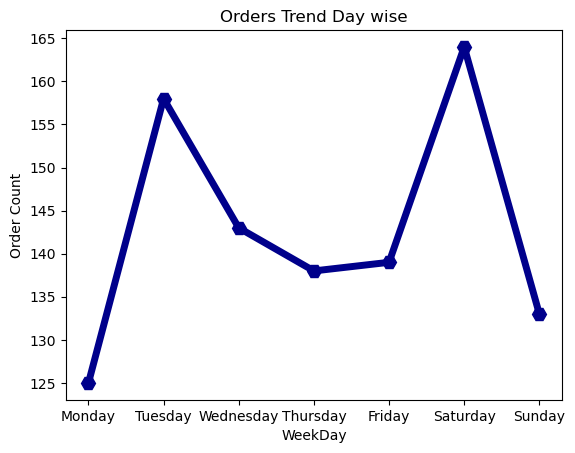

In [133]:
plt.plot(df["dayname"], df["sales_occurrences"], marker = 'H', color = 'darkblue', ms = 10, lw = 5)
plt.xlabel("WeekDay")
plt.ylabel("Order Count")
plt.title("Orders Trend Day wise")
plt.show()

In [35]:
#16.	Identify the customer type contributing the highest revenue.

Q1 = """SELECT `Customer type` FROM(
SELECT `Customer type`, sum(`gross income`) as customer_wise_revenue from amazon group by `Customer type`
order by customer_wise_revenue desc LIMIT 1) as sq1"""
cur.execute(Q1)
pd.read_sql(Q1,conn)

,Customer type
0,Member


In [39]:
# 17.	Determine the city with the highest VAT percentage.
Q1 = "SELECT City, (sum(`Tax 5%`)/sum(Total))*100 as VAT_percentage from amazon group by  City"
cur.execute(Q1)
print(pd.read_sql(Q1,conn))
print()
Q2 = """with vat as(
SELECT City, (sum(`Tax 5%`)/sum(Total))*100 as VAT_percentage from amazon group by  City)
SELECT City from vat where VAT_percentage IN (SELECT MAX(VAT_percentage) FROM vat)"""
cur.execute(Q2)
print(pd.read_sql(Q2,conn))

        City  VAT_percentage
0     Yangon        4.761905
1  Naypyitaw        4.761905
2   Mandalay        4.761905

        City
0  Naypyitaw
1   Mandalay


In [40]:
#18.	Identify the customer type with the highest VAT payments.
Q1 = """with customer_vat as(
SELECT `Customer type`, sum(`Tax 5%`) as customer_VAT_amount from amazon group by  `Customer type`)
SELECT `Customer type` from customer_vat where customer_VAT_amount IN (SELECT MAX(customer_VAT_amount) FROM customer_vat)"""
cur.execute(Q1)
print(pd.read_sql(Q1,conn))

  Customer type
0        Member


In [41]:
#19.	What is the count of distinct customer types in the dataset?
Q1 = "SELECT count(distinct(`Customer type`)) as Distinct_Customer_Types from amazon"
cur.execute(Q1)
print(pd.read_sql(Q1,conn))

   Distinct_Customer_Types
0                        2


In [42]:
#20.	What is the count of distinct payment methods in the dataset?
Q1 = "SELECT count(distinct(Payment)) as Distinct_Payment_Types from amazon"
cur.execute(Q1)
print(pd.read_sql(Q1,conn))

   Distinct_Payment_Types
0                       3


In [43]:
#21.	Which customer type occurs most frequently?
Q1 = """SELECT `Customer type` FROM amazon
GROUP BY `Customer type` HAVING COUNT(*) = 
(
    SELECT MAX(type_count) FROM (SELECT COUNT(*) AS type_count FROM amazon
        GROUP BY `Customer type`
    ) AS cust_type_counts
)"""
cur.execute(Q1)
print(pd.read_sql(Q1,conn))

  Customer type
0        Member


In [44]:
#22.	Identify the customer type with the highest purchase frequency.

Q1 = """SELECT `Customer type`, monthname, customer_cnt, cust_rank
FROM (SELECT `Customer type`, monthname, COUNT(*) AS customer_cnt,
RANK() OVER (PARTITION BY monthname ORDER BY COUNT(*) DESC) AS cust_rank
FROM amazon GROUP BY `Customer type` , monthname) AS cust_freq order by cust_rank"""
cur.execute(Q1)
print(pd.read_sql(Q1,conn))

  Customer type monthname  customer_cnt  cust_rank
0        Member  February           163          1
1        Normal   January           180          1
2        Normal     March           179          1
3        Normal  February           140          2
4        Member   January           172          2
5        Member     March           166          2


In [45]:
#23.	Determine the predominant gender among customers.

Q1 = "SELECT Gender, count(*) as gend_purchase_freq from amazon group by Gender"
cur.execute(Q1)
print(pd.read_sql(Q1,conn))
print()
Q2 = "SELECT Gender, sum(Total) as gend_purchase_Value from amazon group by Gender"
cur.execute(Q2)
print(pd.read_sql(Q2,conn))

   Gender  gend_purchase_freq
0  Female                 501
1    Male                 499

   Gender  gend_purchase_Value
0  Female           167882.925
1    Male           155083.824


In [46]:
#24.	Examine the distribution of genders within each branch.
Q1 = """SELECT Branch, Gender, gender_count, gender_rank
FROM (SELECT Branch, Gender, COUNT(*) AS gender_count,
RANK() OVER (PARTITION BY Branch ORDER BY COUNT(*) DESC) AS gender_rank
FROM amazon GROUP BY Branch, Gender) AS gender_dist order by gender_rank"""
cur.execute(Q1)
pd.read_sql(Q1,conn)

,Branch,Gender,gender_count,gender_rank
0,A,Male,179,1
1,B,Male,170,1
2,C,Female,178,1
3,A,Female,161,2
4,B,Female,162,2
5,C,Male,150,2


In [47]:
#25.	Identify the time of day when customers provide the most ratings.
Q1 = """SELECT Branch, timeofday, avg_rating
FROM (
    SELECT Branch, timeofday, AVG(Rating) AS avg_rating,
    RANK() OVER (PARTITION BY Branch ORDER BY AVG(Rating) DESC) AS rating_rank
    FROM amazon
    GROUP BY Branch, timeofday
) AS rating_distribution WHERE rating_rank = 1"""
cur.execute(Q1)
pd.read_sql(Q1,conn)

,Branch,timeofday,avg_rating
0,A,18,7.318182
1,B,12,7.396000
2,C,12,7.367742


In [48]:
#26.	Determine the time of day with the highest customer ratings for each branch.
Q1 = """SELECT Branch, dayname, avg_rating
FROM (
    SELECT Branch, dayname, AVG(Rating) AS avg_rating,
           dense_RANK() OVER (PARTITION BY Branch ORDER BY AVG(Rating) DESC) AS rating_rank
    FROM amazon
    GROUP BY Branch, dayname
) AS rating_distribution WHERE rating_rank = 1"""
cur.execute(Q1)
pd.read_sql(Q1,conn)

,Branch,dayname,avg_rating
0,A,Friday,7.312000
1,B,Monday,7.335897
2,C,Friday,7.278947


In [50]:
#27.	Identify the day of the week with the highest average ratings.
Q1 = """SELECT dayname, avg_rating, rating_rank
FROM (
    SELECT dayname, AVG(Rating) AS avg_rating,
    RANK() OVER (ORDER BY AVG(Rating) DESC) AS rating_rank
    FROM amazon
    GROUP BY dayname
) AS rating_distribution where rating_rank=1"""
cur.execute(Q1)
pd.read_sql(Q1,conn)

,dayname,avg_rating,rating_rank
0,Monday,7.1536,1


In [61]:
#28.	Determine the day of the week with the highest average ratings for each branch.
Q1 = """SELECT Branch, dayname, avg_rating, rating_rank
FROM (
    SELECT Branch, dayname, AVG(Rating) AS avg_rating,
          DENSE_RANK() OVER (partition by Branch ORDER BY AVG(Rating) DESC) AS rating_rank
    FROM amazon
    GROUP BY Branch, dayname
) AS rating_distribution WHERE rating_rank=1"""
cur.execute(Q1)
pd.read_sql(Q1,conn)

,Branch,dayname,avg_rating,rating_rank
0,A,Friday,7.312000,1
1,B,Monday,7.335897,1
2,C,Friday,7.278947,1


In [73]:
# 1. PRODUCT ANALAYSIS
Q1 = "select `Product line`, AVG(Rating) FROM AMAZON GROUP BY `Product line` order by AVG(Rating) desc"
cur.execute(Q1)
print(pd.read_sql(Q1,conn))
print()
Q1 = "SELECT   `Product line`,  count(*) as order_cnt from amazon group by `Product line` order by order_cnt desc"
cur.execute(Q1)
print(pd.read_sql(Q1,conn))

             Product line  AVG(Rating)
0      Food and beverages     7.113218
1     Fashion accessories     7.029213
2       Health and beauty     7.003289
3  Electronic accessories     6.924706
4       Sports and travel     6.916265
5      Home and lifestyle     6.837500

             Product line  order_cnt
0     Fashion accessories        178
1      Food and beverages        174
2  Electronic accessories        170
3       Sports and travel        166
4      Home and lifestyle        160
5       Health and beauty        152


In [82]:
Q1 = "SELECT `Product line`, Gender, count(*) as prod_cnt from amazon group by `Product line`, Gender Order by  `Product line`,  prod_cnt"

cur.execute(Q1)
print(pd.read_sql(Q1,conn))

              Product line  Gender  prod_cnt
0   Electronic accessories  Female        84
1   Electronic accessories    Male        86
2      Fashion accessories    Male        82
3      Fashion accessories  Female        96
4       Food and beverages    Male        84
5       Food and beverages  Female        90
6        Health and beauty  Female        64
7        Health and beauty    Male        88
8       Home and lifestyle  Female        79
9       Home and lifestyle    Male        81
10       Sports and travel    Male        78
11       Sports and travel  Female        88


In [103]:
Q1 = """with cte1 as (select timeofday, count(*) as prod_cnt from amazon group by timeofday order by timeofday),
cte2 as(SELECT timeofday, prod_cnt,
NTILE(4) OVER(order by timeofday) as timeslots from cte1)
SELECT timeofday, timeslots, 
sum(prod_cnt) over(partition by timeslots) from cte2"""

cur.execute(Q1)
print(pd.read_sql(Q1,conn))

    timeofday  timeslots  sum(prod_cnt) over(partition by timeslots)
0          10          1                                       280.0
1          11          1                                       280.0
2          12          1                                       280.0
3          13          2                                       288.0
4          14          2                                       288.0
5          15          2                                       288.0
6          16          3                                       244.0
7          17          3                                       244.0
8          18          3                                       244.0
9          19          4                                       188.0
10         20          4                                       188.0


In [156]:
Q1 = "SELECT `Product line`, sum(`gross income`) as Gross_Revenue from amazon group by `Product line` order by Gross_Revenue desc"

cur.execute(Q1)
print(pd.read_sql(Q1,conn))

             Product line  Gross_Revenue
0      Food and beverages      2673.5640
1       Sports and travel      2624.8965
2  Electronic accessories      2587.5015
3     Fashion accessories      2585.9950
4      Home and lifestyle      2564.8530
5       Health and beauty      2342.5590


In [157]:
Q1 = "SELECT City, sum(Total) as Total_Sale from amazon group by City order by Total_Sale desc"
cur.execute(Q1)
print(pd.read_sql(Q1,conn))

        City   Total_Sale
0  Naypyitaw  110568.7065
1     Yangon  106200.3705
2   Mandalay  106197.6720


In [138]:
Q1 = "SELECT Gender, sum(Total) as Total_Sale from amazon group by Gender"
cur.execute(Q1)
print(pd.read_sql(Q1,conn))

   Gender  Total_Sale
0  Female  167882.925
1    Male  155083.824


In [139]:
Q1 = "SELECT Payment, sum(Total) as Total_Sale from amazon group by Payment "
cur.execute(Q1)
print(pd.read_sql(Q1,conn))

       Payment  Total_Sale
0      Ewallet  109993.107
1         Cash  112206.570
2  Credit card  100767.072


In [162]:
Q1 = "SELECT dayname, weekdayno, sum(Total) as Total_Sale from amazon group by dayname, weekdayno order by sum(Total) desc"
cur.execute(Q1)
df = pd.read_sql(Q1,conn)
print(df)

     dayname  weekdayno  Total_Sale
0   Saturday          5  56120.8095
1    Tuesday          1  51482.2455
2   Thursday          3  45349.2480
3     Sunday          6  44457.8925
4     Friday          4  43926.3405
5  Wednesday          2  43731.1350
6     Monday          0  37899.0780


In [154]:
Q1 = "SELECT timeofday, sum(Total) from amazon group by timeofday order by sum(Total) desc"
cur.execute(Q1)
df = pd.read_sql(Q1,conn)
print(df)

    timeofday  sum(Total)
0          19  39699.5130
1          13  34723.2270
2          10  31421.4810
3          15  31179.5085
4          14  30828.3990
5          11  30377.3295
6          12  26065.8825
7          18  26030.3400
8          16  25226.3235
9          17  24445.2180
10         20  22969.5270


In [7]:
Q1 = "SELECT monthname, sum(Total) from amazon group by monthname order by sum(Total) desc"
cur.execute(Q1)
df = pd.read_sql(Q1,conn)
print(df)

  monthname  sum(Total)
0   January  116291.868
1     March  109455.507
2  February   97219.374


In [17]:
Q1 = "SELECT `Product line` as Product, sum(`gross income`) as Revenue from amazon group by `Product line` order by sum(`gross income`) desc"
cur.execute(Q1)
df = pd.read_sql(Q1,conn)
print(df)

                  Product    Revenue
0      Food and beverages  2673.5640
1       Sports and travel  2624.8965
2  Electronic accessories  2587.5015
3     Fashion accessories  2585.9950
4      Home and lifestyle  2564.8530
5       Health and beauty  2342.5590


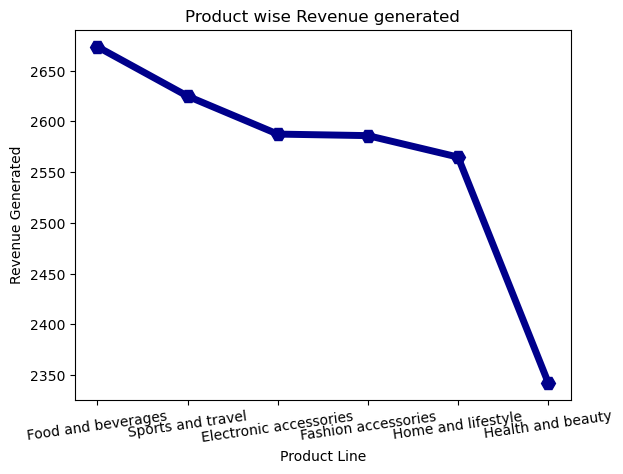

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
cur.execute(Q1)
print(pd.read_sql(Q1,conn))
plt.plot(df["Product"], df["Revenue"], marker = 'H', color = 'darkblue', ms = 10, lw = 5)
plt.xlabel("Product Line")
plt.ylabel("Revenue Generated")
plt.title("Product wise Revenue generated")
plt.xticks(rotation=8) 
plt.show()

In [27]:
Q1 = "SELECT City, Total as Bill_Amount from amazon"
cur.execute(Q1)
df = pd.read_sql(Q1,conn)
print(df)

          City  Bill_Amount
0       Yangon     548.9715
1    Naypyitaw      80.2200
2       Yangon     340.5255
3       Yangon     489.0480
4       Yangon     634.3785
..         ...          ...
995  Naypyitaw      42.3675
996   Mandalay    1022.4900
997     Yangon      33.4320
998     Yangon      69.1110
999     Yangon     649.2990

[1000 rows x 2 columns]


<Axes: xlabel='City', ylabel='Bill_Amount'>

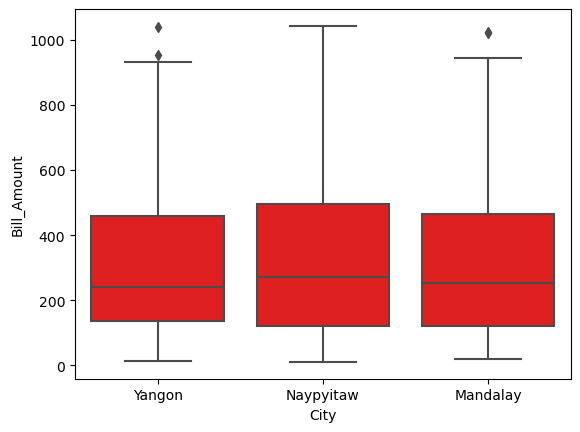

In [29]:
import seaborn as sns
sns.boxplot(x=df["City"], y=df["Bill_Amount"], color="b")
plt.title("Bill Amount City wise Comparision")

In [31]:
Q1 = "SELECT monthname, sum(Total) as Totla_Bill_Amount from amazon group by monthname"
cur.execute(Q1)
df = pd.read_sql(Q1,conn)
print(df)

  monthname  Totla_Bill_Amount
0   January         116291.868
1     March         109455.507
2  February          97219.374


In [54]:
Q1 = """SELECT `Customer type` as Type_of_Customer, Sum(Total) as Total_Purchase_Value, sum(`gross income`) as customer_wise_revenue from amazon group by `Customer type`
order by customer_wise_revenue """
cur.execute(Q1)
df = pd.read_sql(Q1,conn)
print(df)

  Type_of_Customer  Total_Purchase_Value  customer_wise_revenue
0           Normal            158743.305               7559.205
1           Member            164223.444               7820.164


<Axes: xlabel='Type_of_Customer', ylabel='customer_wise_revenue'>

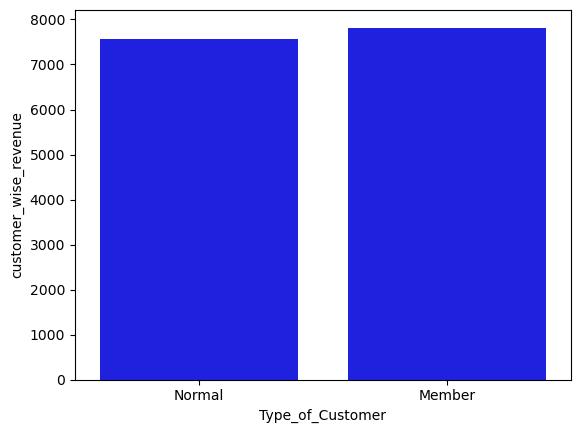

In [56]:
sns.barplot(x=df["Type_of_Customer"], y=df["customer_wise_revenue"], color="b")

In [49]:
Q1 = """SELECT Payment, Sum(Total) as Total_Purchase_Value, sum(`gross income`) as Payment_wise_revenue, 
sum(`Tax 5%`) as Tax5_percent from amazon group by Payment"""

cur.execute(Q1)
df = pd.read_sql(Q1,conn)
print(df)

       Payment  Total_Purchase_Value  Payment_wise_revenue  Tax5_percent
0      Ewallet            109993.107              5237.767      5237.767
1         Cash            112206.570              5343.170      5343.170
2  Credit card            100767.072              4798.432      4798.432


<Axes: xlabel='Payment', ylabel='Tax5_percent'>

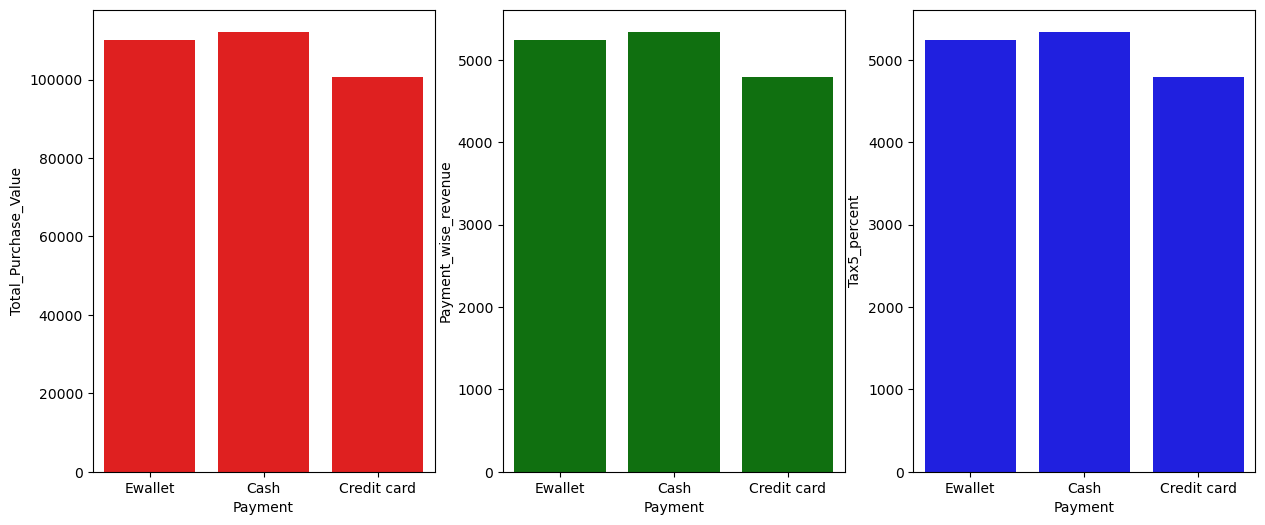

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,6))
plt.subplot(1,3,1)
sns.barplot(x=df["Payment"], y=df["Total_Purchase_Value"], color="r")
plt.subplot(1,3,2)
sns.barplot(x=df["Payment"], y=df["Payment_wise_revenue"], color="g")
plt.subplot(1,3,3)
sns.barplot(x=df["Payment"], y=df["Tax5_percent"], color="b")


In [57]:
Q1 = """SELECT Gender, Sum(Total) as Total_Purchase_Value, sum(`gross income`) as Payment_wise_revenue, 
sum(`Tax 5%`) as Tax5_percent from amazon group by Gender"""

cur.execute(Q1)
df = pd.read_sql(Q1,conn)
print(df)

   Gender  Total_Purchase_Value  Payment_wise_revenue  Tax5_percent
0  Female            167882.925              7994.425      7994.425
1    Male            155083.824              7384.944      7384.944


<Axes: xlabel='Gender', ylabel='Tax5_percent'>

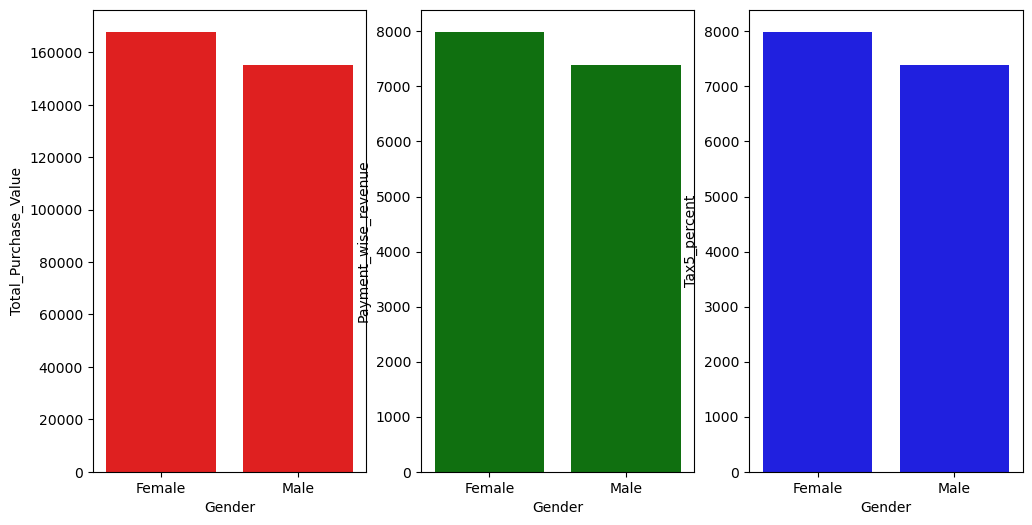

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
sns.barplot(x=df["Gender"], y=df["Total_Purchase_Value"], color="r")
plt.subplot(1,3,2)
sns.barplot(x=df["Gender"], y=df["Payment_wise_revenue"], color="g")
plt.subplot(1,3,3)
sns.barplot(x=df["Gender"], y=df["Tax5_percent"], color="b")

In [69]:
Q1 = """SELECT distinct(Gender), dayname, weekdayno, count(*) over(partition by Gender order by weekdayno) as order_count from amazon """

cur.execute(Q1)
df = pd.read_sql(Q1,conn)
print(df)

    Gender    dayname  weekdayno  order_count
0   Female     Monday          0           68
1   Female    Tuesday          1          155
2   Female  Wednesday          2          219
3   Female   Thursday          3          282
4   Female     Friday          4          347
5   Female   Saturday          5          434
6   Female     Sunday          6          501
7     Male     Monday          0           57
8     Male    Tuesday          1          128
9     Male  Wednesday          2          207
10    Male   Thursday          3          282
11    Male     Friday          4          356
12    Male   Saturday          5          433
13    Male     Sunday          6          499


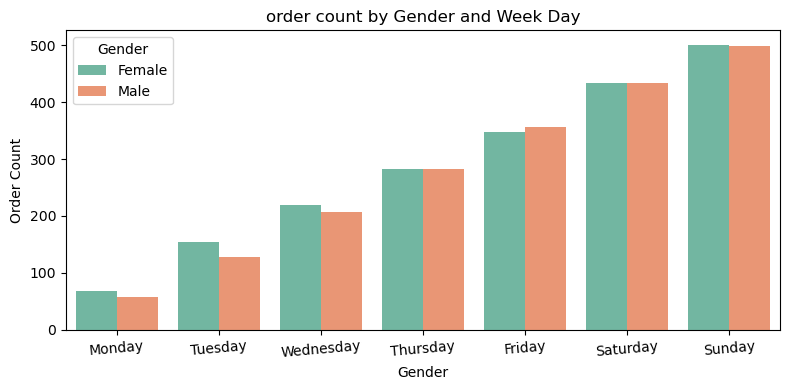

In [76]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='dayname', y='order_count', hue='Gender', palette='Set2')
plt.title('order count by Gender and Week Day')
plt.xlabel('Gender')
plt.ylabel('Order Count')
plt.legend(title='Gender')
plt.xticks(rotation=5)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [79]:
Q1 = """SELECT distinct(timeofday), count(*) over(partition by timeofday) as order_count from amazon """

cur.execute(Q1)
df = pd.read_sql(Q1,conn)
print(df)

    timeofday  order_count
0          10          101
1          11           90
2          12           89
3          13          103
4          14           83
5          15          102
6          16           77
7          17           74
8          18           93
9          19          113
10         20           75


In [88]:
Q1 = """with cte1 as (select timeofday, count(*) as prod_cnt from amazon group by timeofday order by timeofday),
cte2 as(SELECT timeofday, prod_cnt,
NTILE(4) OVER(order by timeofday) as timeslots from cte1)
SELECT timeofday, timeslots, 
sum(prod_cnt) over(partition by timeslots) as Purchase_Orders from cte2"""

cur.execute(Q1)
df = pd.read_sql(Q1,conn)
dict = {1: 'B/N 10Hrs to 12Hrs', 2:'B/N 13Hrs to 15Hrs', 3:'B/N 16Hrs to 18Hrs', 4:'B/N 19Hrs to 20Hrs'}
df['timeslots'] = df['timeslots'].replace(dict)

print(df)

    timeofday           timeslots  Purchase_Orders
0          10  B/N 10Hrs to 12Hrs            280.0
1          11  B/N 10Hrs to 12Hrs            280.0
2          12  B/N 10Hrs to 12Hrs            280.0
3          13  B/N 13Hrs to 15Hrs            288.0
4          14  B/N 13Hrs to 15Hrs            288.0
5          15  B/N 13Hrs to 15Hrs            288.0
6          16  B/N 16Hrs to 18Hrs            244.0
7          17  B/N 16Hrs to 18Hrs            244.0
8          18  B/N 16Hrs to 18Hrs            244.0
9          19  B/N 19Hrs to 20Hrs            188.0
10         20  B/N 19Hrs to 20Hrs            188.0


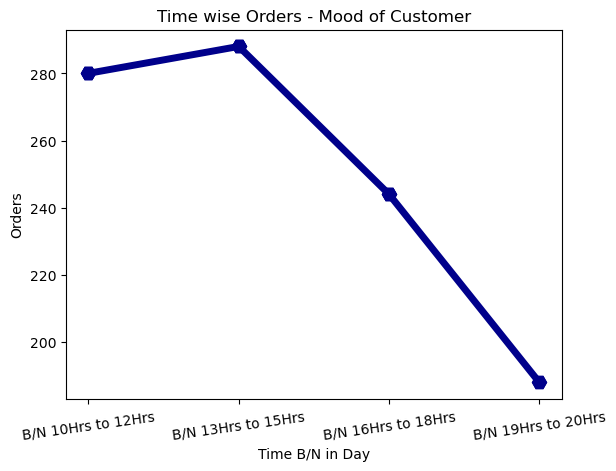

In [89]:
plt.plot(df["timeslots"], df["Purchase_Orders"], marker = 'H', color = 'darkblue', ms = 10, lw = 5)
plt.xlabel("Time B/N in Day")
plt.ylabel("Orders")
plt.title("Time wise Orders - Mood of Customer")
plt.xticks(rotation=8) 
plt.show()